In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame

eth = pd.read_csv('../../../data/ethereum_cleaned.csv')
eth.head()

,Unnamed: 0,Datetime,cleaned,negative,neutral,positive,comp
0,0,2022-05-01,"['eth', 'http', 'co', 'nolnum7c3k']",0.0,1.000,0.000,0.0000
1,1,2022-05-01,"['btc', 'xrp', 'xem', 'lisk', 'iost', 'sand', ...",0.0,0.725,0.275,0.5859
2,2,2022-05-01,"['eth', 'son', '3', 'dip', 'daha', 'yapacak', ...",0.0,1.000,0.000,0.0000
3,3,2022-05-01,"['tigray', 'emerg', 'famin', 'food', 'insecur'...",0.0,1.000,0.000,0.0000
4,4,2022-05-01,"['b', 'nu', 'binanc', 'live', 'nft', 'bnb', 'b...",0.0,1.000,0.000,0.0000


In [3]:
##asigning value to positive, negative and neutral, negative(0), neutral(1), positive(2)
sentiment0=[]
for i in range(len(eth)):
    if eth.loc[i,'negative']>0:
        sentiment0+=[0]
    elif eth.loc[i,'positive']>0:
        sentiment0+=[2]        
    else:
        sentiment0+=[1]     

In [4]:
eth['sentiment']=sentiment0
eth['sentiment'].value_counts()

eth.head()

,Unnamed: 0,Datetime,cleaned,negative,neutral,positive,comp,sentiment
0,0,2022-05-01,"['eth', 'http', 'co', 'nolnum7c3k']",0.0,1.000,0.000,0.0000,1
1,1,2022-05-01,"['btc', 'xrp', 'xem', 'lisk', 'iost', 'sand', ...",0.0,0.725,0.275,0.5859,2
2,2,2022-05-01,"['eth', 'son', '3', 'dip', 'daha', 'yapacak', ...",0.0,1.000,0.000,0.0000,1
3,3,2022-05-01,"['tigray', 'emerg', 'famin', 'food', 'insecur'...",0.0,1.000,0.000,0.0000,1
4,4,2022-05-01,"['b', 'nu', 'binanc', 'live', 'nft', 'bnb', 'b...",0.0,1.000,0.000,0.0000,1


In [10]:
# Assign the data to X and y

X = eth[["negative", "positive", "neutral"]]
y = eth["sentiment"].values.reshape(-1, 1)
print(X.shape, y.shape)

(160016, 3) (160016, 1)


In [11]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
# Create the model using LinearRegression
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

print(X.shape)
# YOUR CODE HERE

(160016, 3)


In [13]:
# Fit the model to the training data and calculate the scores for the training and testing data
model.fit(X_train, y_train)
# YOUR CODE HERE

training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.5729356435801507
Testing Score: 0.5722361477798317


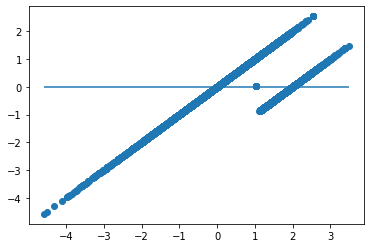

In [14]:
# Plot the Residuals for the Training and Testing data
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()
# YOUR CODE HERE